In [162]:
import requests
import pandas as pd
import config
import pprint
import numpy
import re
import matplotlib.pyplot as plt

## 1. Cryptocompare

Scrape cryptocompare for data on coins.

In [2]:
cc_api_key = config.CRYPTO_COMPARE_API
cmc_api_key = config.COINMARKETCAP_API
path_data_viz = config.PATH_DATA_VIZ
path_data_temp = config.PAHT_DATA_TEMP

In [ ]:
# Call API coin endpoint

coin_endpoint = 'https://min-api.cryptocompare.com/data/all/coinlist?extraParams=CorrieCoin&api_key='

r = coin_endpoint + cc_api_key

coin_search = requests.get(r).json()

In [ ]:
# Create empty dataframe

coins = pd.DataFrame(columns=['algorithm',
                              'built_on',
                              'coin_name',
                              'content_created_on',
                              'full_name',
                              'fully_premined',
                              'id',
                              'is_trading',
                              'name',
                              'pre_mined_value',
                              'proof_type',
                              'smart_contract_address',
                              'symbol',
                              'total_coin_supply',
                              'total_coins_free_float',
                              'total_coins_mined'                                                 
                             ])

In [ ]:
# Append JSON response to dataframe

for data, coin in coin_search['Data'].items():
    algorithm = coin['Algorithm']
    built_on = coin['BuiltOn']
    coin_name = coin['CoinName']
    content_created_on = coin['ContentCreatedOn']
    full_name = coin['FullName']
    fully_premined = coin['FullyPremined']
    id_nr = coin['Id']
    is_trading = coin['IsTrading']
    name = coin['Name']
    pre_mined_value = coin['PreMinedValue']
    proof_type = coin['ProofType']
    smart_contract_address = coin['SmartContractAddress']
    symbol = coin['Symbol']
    total_coin_supply = coin['TotalCoinSupply']
    total_coins_free_float = coin['TotalCoinsFreeFloat']
    total_coins_mined = coin.get('TotalCoinsMined', 'not available')
    
    coins = coins.append({'algorithm' : algorithm,
                          'built_on' : built_on,
                          'coin_name' : coin_name,
                          'content_created_on' : content_created_on,
                          'full_name' : full_name,
                          'fully_premined' : fully_premined,
                          'id' : id_nr,
                          'is_trading' : is_trading,
                          'name' : name,
                          'pre_mined_value' : pre_mined_value,
                          'proof_type' : proof_type,
                          'smart_contract_address' : smart_contract_address,
                          'symbol' : symbol,
                          'total_coin_supply': total_coin_supply,
                          'total_coins_free_float' : total_coins_free_float,
                          'total_coins_mined': total_coins_mined}, ignore_index=True)

In [ ]:
# Check

len(coins)

In [ ]:
# Write to file

coins.to_csv('/home/dim/Documents/projecten/bitcoin/data/crypto_statistics/cryptocompare_coins_oct_2019.csv')

## 2. CoinMarketCap

Let's get some data from CoinMarketCap. First get basic data on all the coins through the listing endpoint.

In [ ]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': cmc_api_key
}
parameters = {
  'start':'1',
  'limit':'5000'
}
listing = requests.get(url, params=parameters, headers=headers).json()


In [ ]:
basic_cmc_data = pd.DataFrame(columns=['id',
                                   'name',
                                   'symbol',
                                   'slug',
                                   'num_market_pairs',
                                   'date_added',
                                   'tags',
                                   'max_supply',
                                   'circulating_supply',
                                   'total_supply'
    
                                    ])

for value in listing['data']:
    id_nr = value['id']
    name = value['name']
    symbol = value['symbol']
    slug = value['slug']
    num_market_pairs = value['num_market_pairs']
    date_added = value['date_added']
    tags = value['tags']
    max_supply = value['max_supply']
    circulating_supply = value['circulating_supply']
    total_supply = value['total_supply']
    
    basic_cmc_data = basic_cmc_data.append({'id' : id_nr,
                                           'name' : name,
                                           'symbol' : symbol,
                                           'slug' : slug,
                                           'num_market_pairs' : num_market_pairs,
                                           'date_added' : date_added,
                                           'tags' : tags,
                                           'max_supply' : max_supply,
                                           'circulating_supply' : circulating_supply,
                                           'total_supply' : total_supply
        
                                            }, ignore_index=True)

In [ ]:
# Extract all id's and convert them to a list

id_list = basic_cmc_data['id'].tolist()

# And chop them up in chunks of n/30

chunks = numpy.array_split(numpy.array(id_list),30)

Use listing data to get extra information through the info endpoint.

In [ ]:
# Create empty dataframe

cmc_coins = pd.DataFrame(columns=['category',
                                  'date_added',
                                  'description',
                                  'id_nr',
                                  'name',
                                  'notice',
                                  'platform',
                                  'slug',
                                  'symbol',
                                  'tags',
                                  'announcement',
                                  'chat',
                                  'explorer',
                                  'message_board',
                                  'reddit',
                                  'source_code',
                                  'technical_doc',
                                  'twitter',
                                  'website'                                
                                  ])

# Set the URL and the headers

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/info'

headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': cmc_api_key
    }


# Iterate over chunks, call API, and append dataframe with JSON response

for chunk in chunks:
    string = ''
    for i in chunk:
        string += str(i) + ','
    string = string[:-1]

    parameters = {
      'id': string
    }

    coin_info = requests.get(url, params=parameters, headers=headers).json()

    for data, coin in coin_info['data'].items():
        category = coin['category']
        date_added = coin['date_added']
        description = coin['description']
        id_nr = coin['id']
        name = coin['name']
        notice = coin['notice']
        platform = coin['platform']
        slug = coin['slug']
        symbol = coin['symbol']
        tags = coin['tags']
        announcement = coin.get('announcement')
        chat = coin.get('chat'),
        explorer = coin.get('explorer')
        message_board = coin.get('message_board')
        reddit = coin.get('reddit')
        source_code = coin.get('source_code')
        technical_doc = coin.get('technical_doc')
        twitter = coin.get('twitter')
        website = coin.get('website')

        cmc_coins = cmc_coins.append({'category' : category,
                                  'date_added' : date_added,
                                  'description' : description,
                                  'id_nr' : id_nr,
                                  'name' : name,
                                  'notice' : notice,
                                  'platform' : platform,
                                  'slug': slug,
                                  'symbol' : symbol,
                                  'tags' : tags,
                                  'announcement' : announcement,
                                  'chat' : chat,
                                  'explorer' : explorer,
                                  'message_board' : message_board,
                                  'reddit' : reddit,
                                  'source_code' : source_code,
                                  'technical_doc' : technical_doc,
                                  'twitter' : twitter,
                                  'website' : website
        
                                }, ignore_index=True)
    



In [ ]:
# Write to csv

cmc_coins.to_csv(path_data_temp + coinmarketcap_coins_oct_2019.csv')

## Analysis

So we have three files with coin data
1. binance_issue_dates.csv
2. coinmarketcap_coins_oct_2019.csv
3. cryptocompare_coins_oct_2019.csv

Now we need to extract all the relevant data from these files and add them to one dataframe that serves as a basis for a visualization.

In [69]:
binance = pd.read_csv(path_data_temp + 'binance_issue_dates.csv')
cmc = pd.read_csv(path_data_temp + 'coinmarketcap_coins_oct_2019.csv', )
cc = pd.read_csv(path_data_temp + 'cryptocompare_coins_oct_2019.csv')

In [102]:
# Clean op binance dataframe

binance['Source Url'] = binance['Source Url'].str.replace('https://info.binance.com/en/currencies/', '')
binance['Source Url'] = binance['Source Url'].str.replace('-', ' ')

binance = binance.rename(columns={'Issue_Date': 'date_binance', 'Source Url': 'name'})

In [71]:
# Select subset of columns

cmc = cmc[['symbol', 'slug', 'name', 'tags', 'category', 'date_added', 'description']]
cc = cc[['symbol', 'full_name', 'is_trading', 'content_created_on', 'algorithm']]

In [84]:
# Normalize dates

cmc['date_cmc'] = pd.to_datetime(cmc['date_added'], format='%Y-%m-%d').dt.date
cc['date_cc'] = pd.to_datetime(cc['content_created_on'],unit='s').dt.date

# Clean up columns

cmc['name'] = cmc['name'].str.lower()
pat = re.compile('\s\([A-Z0-9]+\)', re.IGNORECASE)
cc['full_name'] = cc['full_name'].replace(pat, '').str.lower()
cc['symbol'] = cc['symbol'].astype(str)
cmc['symbol'] = cmc['symbol'].astype(str)

In [91]:
cc_cmc = pd.merge(cc, cmc, on='symbol', how='left')
len(cc_cmc)

In [151]:
all_coins = pd.merge(cc_cmc, binance, on='name', how='left')
all_coins['category'].fillna('unknown', inplace=True)


In [152]:
all_coins[['date_cc', 'date_binance', 'date_cmc']] = all_coins[['date_cc', 'date_binance', 'date_cmc']].apply(pd.to_datetime, errors='coerce')

In [153]:
all_coins = all_coins.assign(earliest_date=lambda d: d[['date_cc', 'date_binance', 'date_cmc']].min(1))
all_coins['year'] = pd.DatetimeIndex(all_coins['earliest_date']).year

In [167]:
viz = all_coins[['symbol', 'earliest_date', 'category', 'year']]

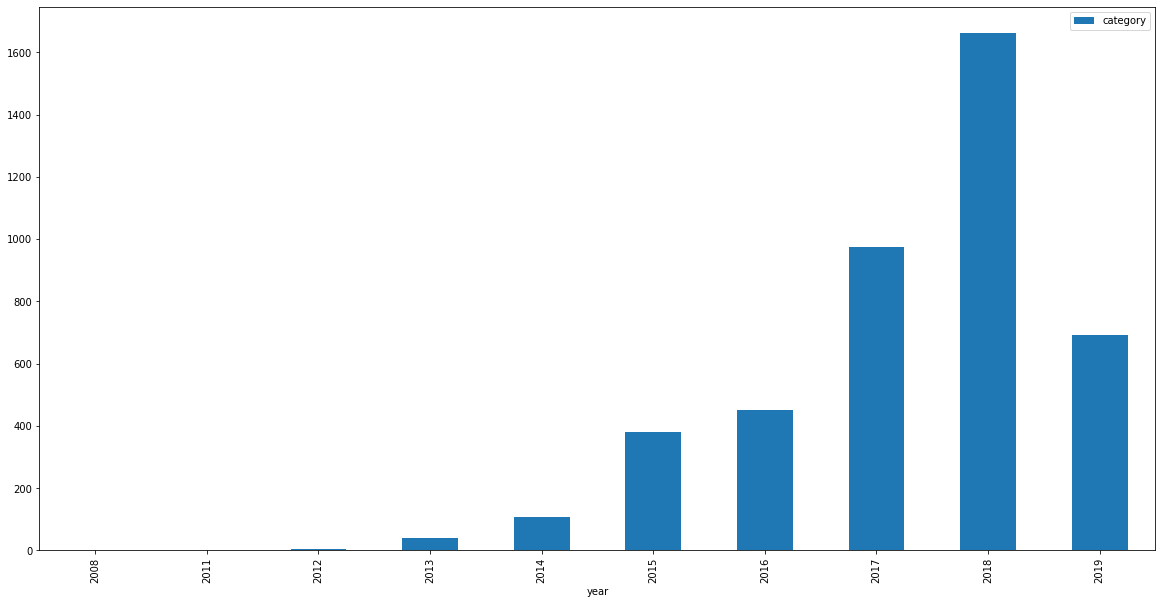

In [168]:
viz1 = viz.groupby(viz['year']).count().plot(kind='bar', y='category', figsize=(20,10))
viz1

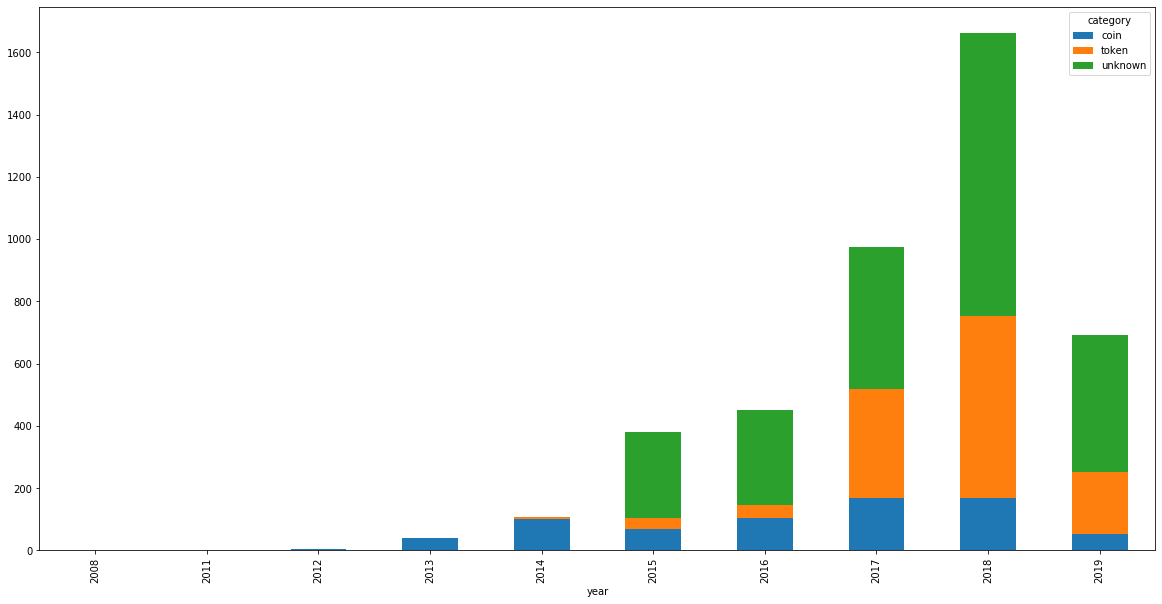

In [169]:

viz2 = viz.groupby(['year', 'category']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

viz2